# Factors that influence performance
#### Here we will investigate what influences performance of a class 8th student.
#### For this we will create categories on basis of marks
#### High scoring students(HSS) - 85+
#### Good scoring students(GSS) - 70-85
#### Average scoring students(ASS) - 55-70
#### Below average scoring students(BASS) - 40-55
#### Low scoring students(LSS) - <40

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading files
marks= pd.read_csv('nas-pupil-marks.csv')
labels= pd.read_csv('nas-labels.csv')

In [3]:
marks.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [4]:
# Creates categories- HSS,GSS,ASS,BASS and LSS
def categorize(subject):
    mark=np.array(marks[subject])
    categories=[]
    for i in mark:
        if i>=85:
            categories.append('HSS')
        elif (i>=70) and (i<85):
            categories.append('GSS')
        elif (i>=55) and (i<70):
            categories.append('ASS')
        elif (i>=40) and (i<55):
            categories.append('BASS')
        elif np.isnan(i):
            categories.append('NaN')
        else:
            categories.append('LSS')
    return categories

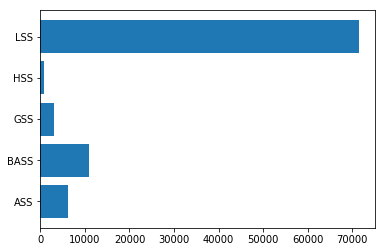

In [5]:
# Performance of students in Maths
plt.barh(np.unique(categorize('Maths %'),return_counts=True)[0][:5],np.unique(categorize('Maths %'),return_counts=True)[1][:5])
marks['Maths_cat']=categorize('Maths %')

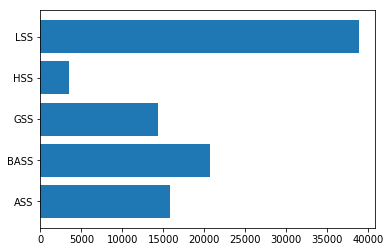

In [6]:
# Performance of students in Reading
plt.barh(np.unique(categorize('Reading %'),return_counts=True)[0][:5],np.unique(categorize('Reading %'),return_counts=True)[1][:5])
marks['Reading_cat']=categorize('Reading %')

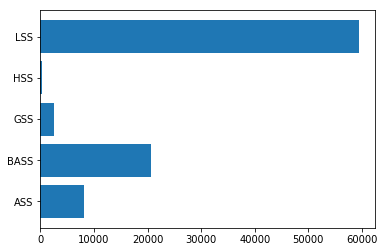

In [7]:
# Performance of students in Science
plt.barh(np.unique(categorize('Science %'),return_counts=True)[0][:5],np.unique(categorize('Science %'),return_counts=True)[1][:5])
marks['Science_cat']=categorize('Science %')

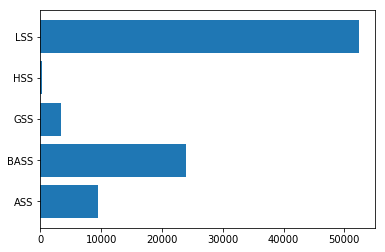

In [8]:
# Performance of students in Social
plt.barh(np.unique(categorize('Social %'),return_counts=True)[0][:5],np.unique(categorize('Social %'),return_counts=True)[1][:5])
marks['Social_cat']=categorize('Social %')

In [9]:
subjects=['Maths %','Reading %','Science %','Social %']
overall=np.array(marks[subjects])
marks['Overall %']=[np.nansum(m)/(4-len(m[np.isnan(m)])) for m in overall]
marks.head()

/home/suyash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Help in household,Maths %,Reading %,Science %,Social %,Maths_cat,Reading_cat,Science_cat,Social_cat,Overall %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,4,20.37,NaN,27.78,NaN,LSS,NaN,LSS,NaN,24.075
1,11011001002,AP,1,2,3,4,2,5,2,2,...,4,12.96,NaN,38.18,NaN,LSS,NaN,LSS,NaN,25.570
2,11011001003,AP,1,2,3,4,2,5,2,1,...,4,27.78,70.00,NaN,NaN,LSS,GSS,NaN,NaN,48.890
3,11011001004,AP,1,2,3,3,2,4,2,1,...,4,NaN,56.67,NaN,36.00,NaN,ASS,NaN,LSS,46.335
4,11011001005,AP,1,2,3,3,2,5,2,1,...,4,NaN,NaN,14.55,8.33,NaN,NaN,LSS,LSS,11.440


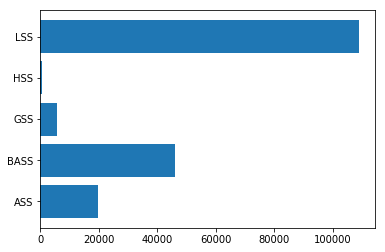

In [10]:
# Overall Performance of students
plt.barh(np.unique(categorize('Overall %'),return_counts=True)[0][:5],np.unique(categorize('Overall %'),return_counts=True)[1][:5])
marks['Overall_cat']=categorize('Overall %')

# Feature Creation
Following features are created using existing features. Features like 'Maths is difficult', 'Conduct Experiments', 'Answer English Aloud' appear to be very important factors, but they didn't contribute much when considered alone. So such features were combined together to form new features.
#### 'inE' - Interest in English
#### 'inM' - Interest in Maths
#### 'inSci' - Interest in Science
#### 'inSo' - Interest in Social Science

In [11]:
#Interest in English
marks['inE']=(marks['Read English']+marks['Dictionary to learn']+marks['Answer English WB']+marks['Answer English aloud'])/marks['English is difficult']
np.std(marks[['inE','Maths %','Reading %','Science %','Social %','Overall %']].groupby(['inE']).median())

Maths %      2.290715
Reading %    7.285156
Science %    1.997004
Social %     2.358157
Overall %    3.029950
dtype: float64

In [12]:
#Interest in Maths
marks['inM']=(marks['Solve Maths']+marks['Solve Maths in groups']+marks['Draw geometry'])+(marks['Give Math HW']/4)/marks['Maths is difficult']
np.std(marks[['inM','Maths %','Reading %','Science %','Social %','Overall %']].groupby(['inM']).median())

Maths %      4.905857
Reading %    8.045248
Science %    3.384987
Social %     4.199306
Overall %    5.430159
dtype: float64

In [13]:
#Interest in Science
marks['inSci']=(marks['Solve science problems']+marks['Conduct experiments']+marks['Observe experiments']+marks['Express science views'])+(marks['Give Scie HW']/4)/marks['Science is difficult']
np.std(marks[['inSci','Maths %','Reading %','Science %','Social %','Overall %']].groupby(['inSci']).median())

Maths %      2.513451
Reading %    7.741183
Science %    4.005513
Social %     3.691095
Overall %    3.846218
dtype: float64

In [14]:
#Interest in Social Science
marks['inSo']=(marks['Participate in SocSci']+marks['Express SocSci views']+marks['Small groups in SocSci']+marks['Historical excursions']+(marks['Give SoSc HW']/4))/marks['SocSci is difficult']
np.std(marks[['inSo','Maths %','Reading %','Science %','Social %','Overall %']].groupby(['inSo']).median())

Maths %      2.477359
Reading %    7.673653
Science %    3.881019
Social %     3.189216
Overall %    3.734308
dtype: float64

In [15]:
cols=[u'State', u'Gender', u'Age', u'Category',
       u'Same language', u'Siblings', u'Handicap', u'Father edu',
       u'Mother edu', u'Father occupation', u'Mother occupation',
       u'Below poverty', u'Use calculator', u'Use computer', u'Use Internet',
       u'Use dictionary', u'Read other books', u'# Books', u'Distance',
       u'Computer use', u'Library use', u'Like school', u'Subjects',
       u'Give Lang HW', u'Give Math HW', u'Give Scie HW', u'Give SoSc HW',
       u'Correct Lang HW', u'Correct Math HW', u'Correct Scie HW',
       u'Correct SocS HW', u'Help in Study', u'Private tuition',
       u'English is difficult', u'Read English', u'Dictionary to learn',
       u'Answer English WB', u'Answer English aloud', u'Maths is difficult',
       u'Solve Maths', u'Solve Maths in groups', u'Draw geometry',
       u'Explain answers', u'SocSci is difficult', u'Historical excursions',
       u'Participate in SocSci', u'Small groups in SocSci',
       u'Express SocSci views', u'Science is difficult',
       u'Observe experiments', u'Conduct experiments',
       u'Solve science problems', u'Express science views', u'Watch TV',
       u'Read magazine', u'Read a book', u'Play games', u'Help in household','inE','inM','inSci','inSo']
subjects=['Maths %','Reading %','Science %','Social %','Overall %']

# Calculating effect of each factor
Output of the following shows how performance in each subject and overall changes under different situation.
Each factor has multiple categories, and for each category median(as it can handle outliers) is calculated.
For example- 
Factor 'Mother Edu' has 6 categories ranging from 0 to 5.
So for each category i.e [0,1,2,3,4,5] median of the marks is calculated.
Then the standard deviation is calculated for the whole factor which shows how much median changes for each factor thus revealing the impact the factor has on marks.
Top 10 factors that affect performance are shown with the graphs with weight being the standard deviation.

Maths %


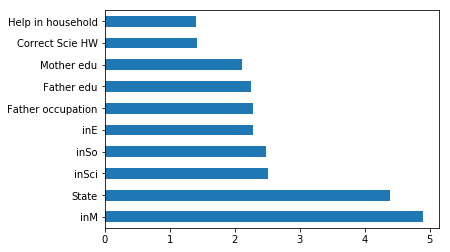

Reading %


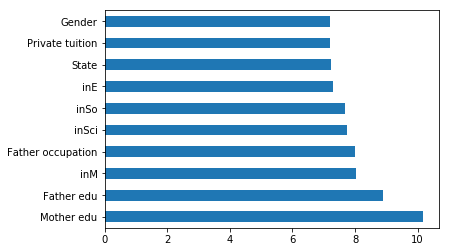

Science %


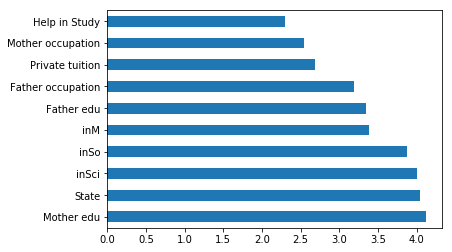

Social %


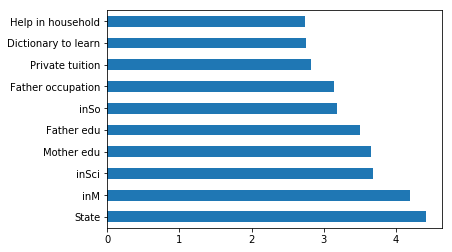

Overall %


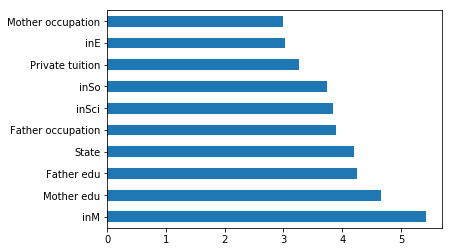

In [16]:
df={}
for i in cols:
    df[i]=np.std(marks[[i,'Maths %','Reading %','Science %','Social %','Overall %']].groupby([i]).median())
df=pd.DataFrame(df).transpose()

for sub in subjects:
    print sub
    df=df.sort_values([sub],ascending=False)
    df[:10][sub].plot.barh()
    plt.show()
